<a href="https://colab.research.google.com/github/RittickSR/Machine-Learning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [0]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)#class to be made 0
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)#class to be made 1

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)#vertically satck all the features
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))#horizongtally stack no. of labels as classes

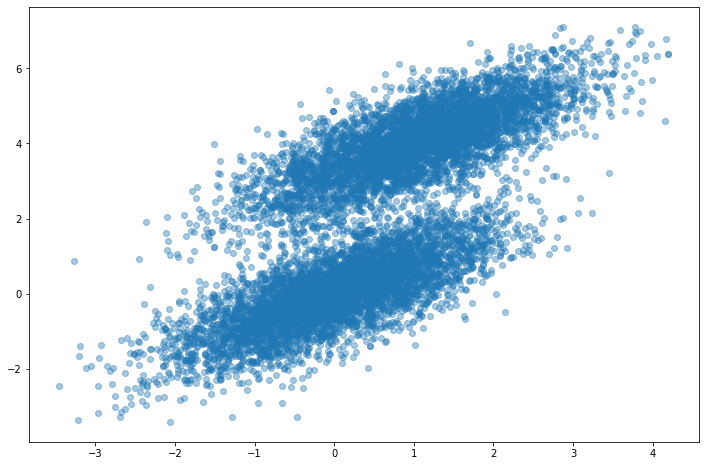

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
             alpha = .4)

In [0]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [0]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [0]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        print("Epoch : ",step,"  out of  ",num_steps)
        
    return weights

In [38]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

Streaming output truncated to the last 5000 lines.
Epoch :  295001   out of   300000
Epoch :  295002   out of   300000
Epoch :  295003   out of   300000
Epoch :  295004   out of   300000
Epoch :  295005   out of   300000
Epoch :  295006   out of   300000
Epoch :  295007   out of   300000
Epoch :  295008   out of   300000
Epoch :  295009   out of   300000
Epoch :  295010   out of   300000
Epoch :  295011   out of   300000
Epoch :  295012   out of   300000
Epoch :  295013   out of   300000
Epoch :  295014   out of   300000
Epoch :  295015   out of   300000
Epoch :  295016   out of   300000
Epoch :  295017   out of   300000
Epoch :  295018   out of   300000
Epoch :  295019   out of   300000
Epoch :  295020   out of   300000
Epoch :  295021   out of   300000
Epoch :  295022   out of   300000
Epoch :  295023   out of   300000
Epoch :  295024   out of   300000
Epoch :  295025   out of   300000
Epoch :  295026   out of   300000
Epoch :  295027   out of   300000
Epoch :  295028   out of   3000

In [0]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

In [34]:
tp=np.sum((preds==1)&(simulated_labels==1))
fp=np.sum((preds==1)&(simulated_labels==0))
fn=np.sum((preds==0)&(simulated_labels==1))
print("Precision is : ", (tp/(tp+fp)))
print("Recall is : ", (tp/(tp+fn)))

true positives : 4974    False psoitives :  26    False negetives : 26
Precision is :  0.9948
Recall is :  0.9948


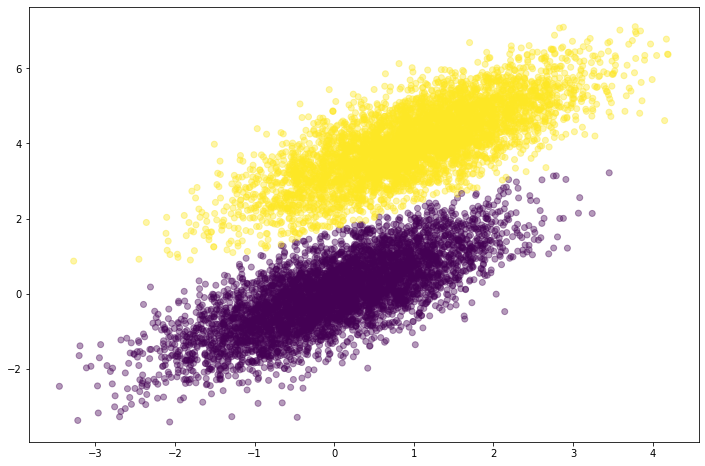

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds, alpha = .4)

In [39]:
print(.shape)

(10000, 2)
